In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.under_sampling import TomekLinks

In [3]:
df = pd.read_csv("data/light_train.csv", sep=";", decimal=',')

print("ROWS:", df.shape[0], "COLUMNS: ", df.shape[1], "\n")

# set the correct typing to columns
df['montant'] = pd.to_numeric(df['montant'], downcast='float')
df['datetransaction'] = pd.to_datetime(df['datetransaction'])

# useless columns
df.drop(['zibzin', 'idavisautorisationcheque'], axis=1, inplace=True)

ROWS: 196722 COLUMNS:  23 



# Under-sampling

In [5]:
# get the count of fraud transactions
fraud_count = df['flagimpaye'].value_counts()[1]

# shuffle
df = df.sample(frac=1)

# take samples of each class and bind them in a new data frame
balanced_df = pd.concat([df.loc[df['flagimpaye'] == 1],
                         df.loc[df['flagimpaye'] == 0][:fraud_count]])

# shuffle again
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [6]:
print(balanced_df['flagimpaye'].value_counts())
px.pie(values=balanced_df["flagimpaye"].value_counts(), names=["0", "1"], title="Under-Sampled data frame from light_train.csv")

0    552
1    552
Name: flagimpaye, dtype: int64


In [7]:
balanced_train = pd.read_csv("data/balanced_train.csv", sep=";", decimal=',')
print(balanced_train['flagimpaye'].value_counts())
px.pie(values=balanced_train["flagimpaye"].value_counts(), names=["0", "1"], title="Under-Sampled data frame from balanced_train.csv")

X_train = pd.read_csv("data/balanced_train.csv", sep=";", decimal=',')
X_train.drop(['zibzin', 'idavisautorisationcheque', 'datetransaction'], axis=1, inplace=True)
Y_train = np.array(X_train['flagimpaye'])
X_train.drop(['flagimpaye'], axis=1, inplace=True)

tl = TomekLinks()
X_res, Y_res = tl.fit_resample(X_train, Y_train)
balanced_train_tomek = X_res
balanced_train_tomek['flagimpaye'] = Y_res
print(balanced_train_tomek['flagimpaye'].value_counts())

0    5403
1    5402
Name: flagimpaye, dtype: int64
1    5402
0    4341
Name: flagimpaye, dtype: int64


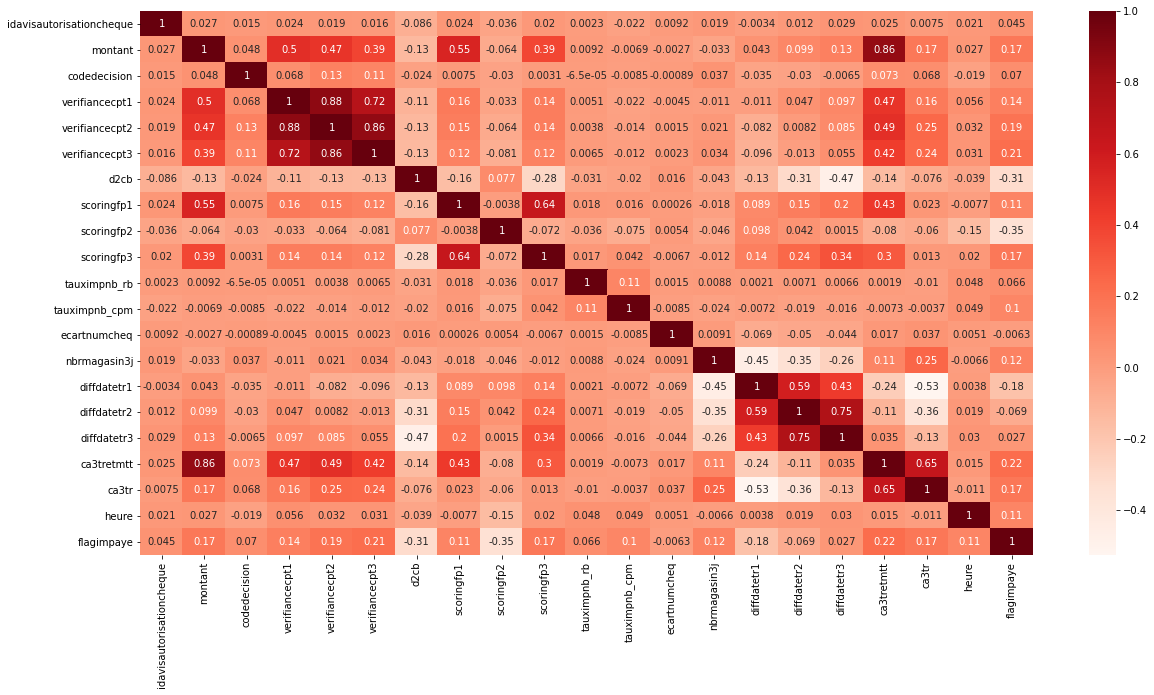

In [8]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(balanced_train.corr(), annot=True, cbar=True, cmap=plt.cm.Reds)

[None, None]

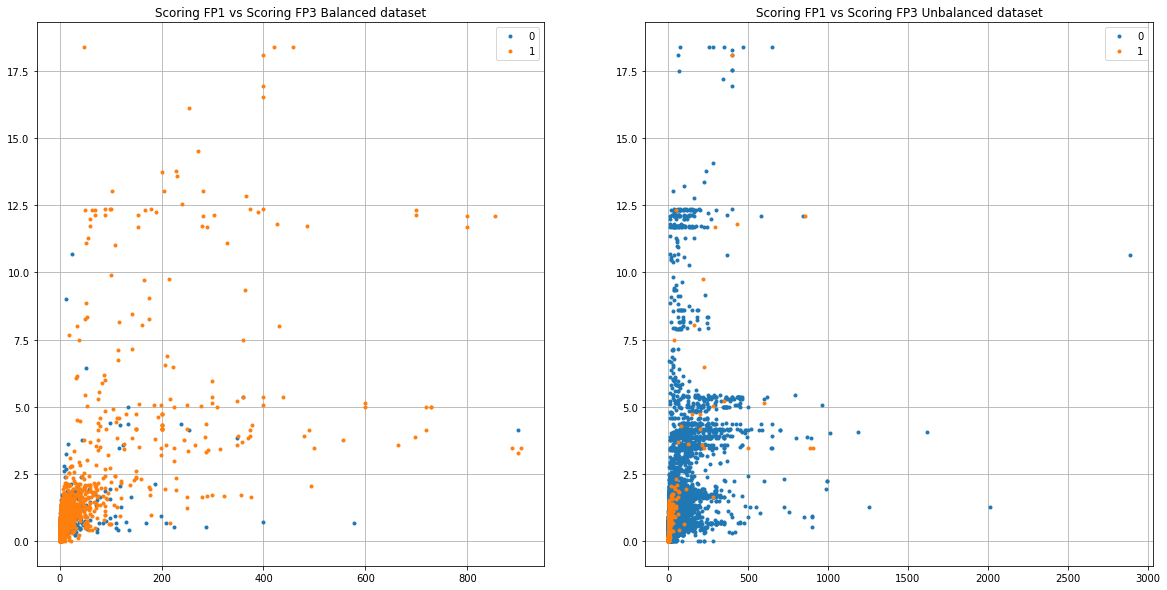

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

axs[0].plot(balanced_train[balanced_train["flagimpaye"] == 0 ]["scoringfp1"],
        balanced_train[balanced_train["flagimpaye"] == 0 ]["scoringfp3"], marker='.', linestyle='',
        label="0")
axs[0].plot(balanced_train[balanced_train["flagimpaye"] == 1 ]["scoringfp1"],
        balanced_train[balanced_train["flagimpaye"] == 1 ]["scoringfp3"], marker='.', linestyle='',
        label="1")
axs[0].set_title("Scoring FP1 vs Scoring FP3 Balanced dataset")


axs[1].plot(df[df["flagimpaye"] == 0 ]["scoringfp1"],
        df[df["flagimpaye"] == 0 ]["scoringfp3"], marker='.', linestyle='',
        label="0")
axs[1].plot(df[df["flagimpaye"] == 1 ]["scoringfp1"],
        df[df["flagimpaye"] == 1 ]["scoringfp3"], marker='.', linestyle='',
        label="1")
axs[1].set_title("Scoring FP1 vs Scoring FP3 Unbalanced dataset")

[ax.legend() for ax in axs ]
[ax.grid() for ax in axs ]
# [ax.set_xscale('log') for ax in axs ]
# [ax.set_yscale('log') for ax in axs ]

[None, None]

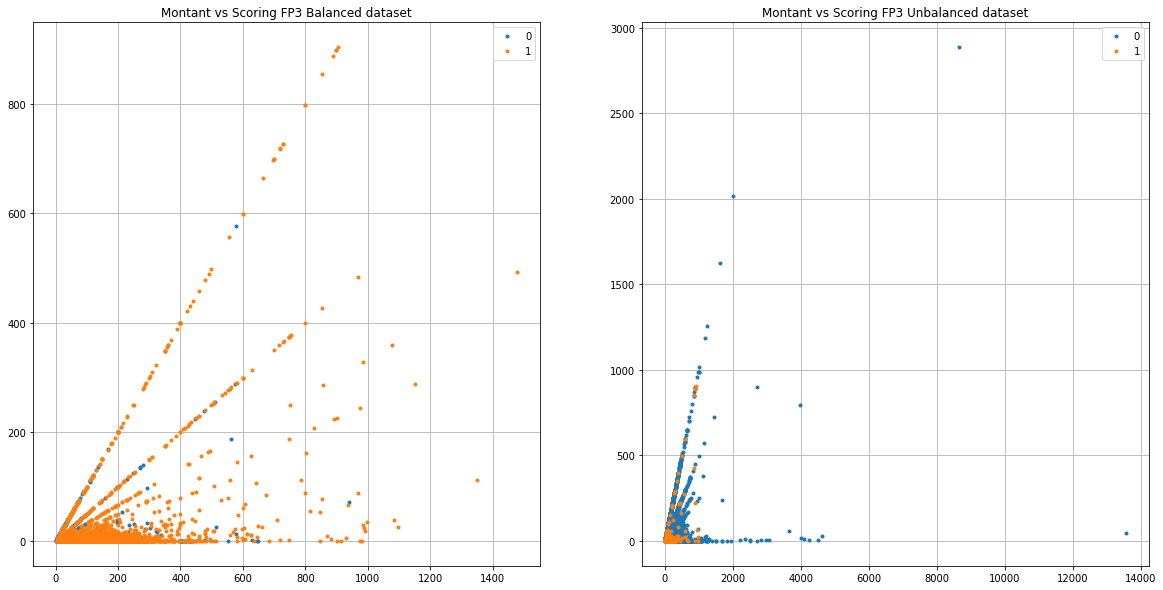

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
axs[0].plot(balanced_train[balanced_train["flagimpaye"] == 0 ]["montant"],
        balanced_train[balanced_train["flagimpaye"] == 0 ]["scoringfp1"], marker='.', linestyle='',
        label="0")
axs[0].plot(balanced_train[balanced_train["flagimpaye"] == 1 ]["montant"],
        balanced_train[balanced_train["flagimpaye"] == 1 ]["scoringfp1"], marker='.', linestyle='',
        label="1")
axs[0].set_title("Montant vs Scoring FP3 Balanced dataset")


axs[1].plot(df[df["flagimpaye"] == 0 ]["montant"],
        df[df["flagimpaye"] == 0 ]["scoringfp1"], marker='.', linestyle='',
        label="0")
axs[1].plot(df[df["flagimpaye"] == 1 ]["montant"],
        df[df["flagimpaye"] == 1 ]["scoringfp1"], marker='.', linestyle='',
        label="1")
axs[1].set_title("Montant vs Scoring FP3 Unbalanced dataset")

[ax.legend() for ax in axs ]
[ax.grid() for ax in axs ]
# [ax.set_xscale('log') for ax in axs ]
# [ax.set_yscale('log') for ax in axs ]

[None, None]

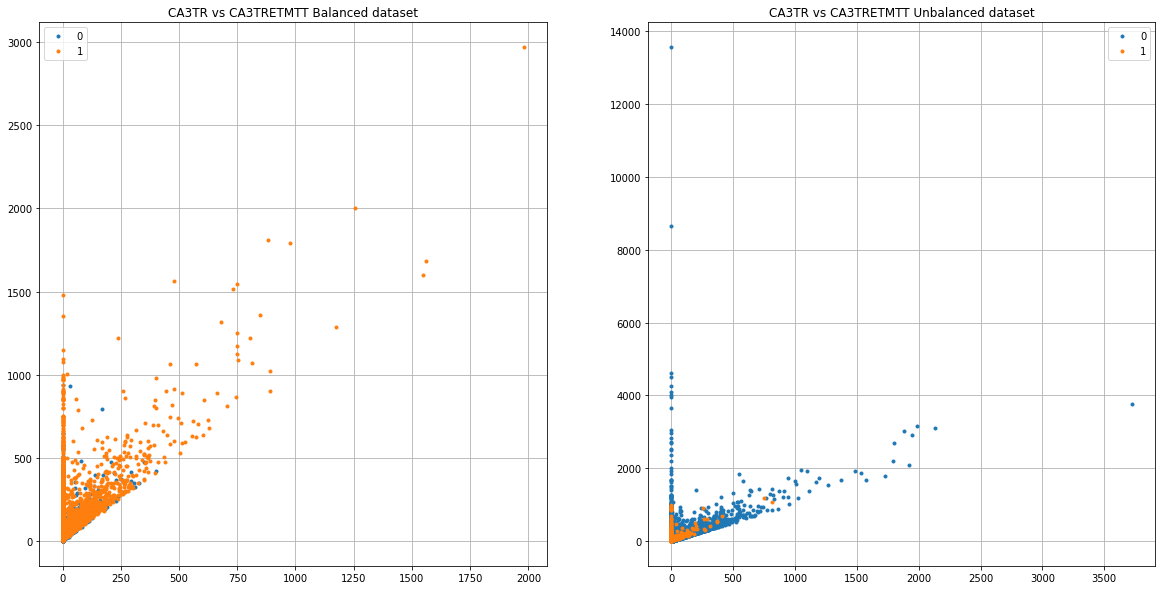

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

axs[0].plot(balanced_train[balanced_train["flagimpaye"] == 0 ]["ca3tr"],
        balanced_train[balanced_train["flagimpaye"] == 0 ]["ca3tretmtt"], marker='.', linestyle='',
        label="0")
axs[0].plot(balanced_train[balanced_train["flagimpaye"] == 1 ]["ca3tr"],
        balanced_train[balanced_train["flagimpaye"] == 1 ]["ca3tretmtt"], marker='.', linestyle='',
        label="1")
axs[0].set_title("CA3TR vs CA3TRETMTT Balanced dataset")

axs[1].plot(df[df["flagimpaye"] == 0 ]["ca3tr"],
        df[df["flagimpaye"] == 0 ]["ca3tretmtt"], marker='.', linestyle='',
        label="0")
axs[1].plot(df[df["flagimpaye"] == 1 ]["ca3tr"],
        df[df["flagimpaye"] == 1 ]["ca3tretmtt"], marker='.', linestyle='',
        label="1")
axs[1].set_title("CA3TR vs CA3TRETMTT Unbalanced dataset")

[ax.legend() for ax in axs ]
[ax.grid() for ax in axs ]
# [ax.set_xscale('log') for ax in axs ]
# [ax.set_yscale('log') for ax in axs ]

[None, None]

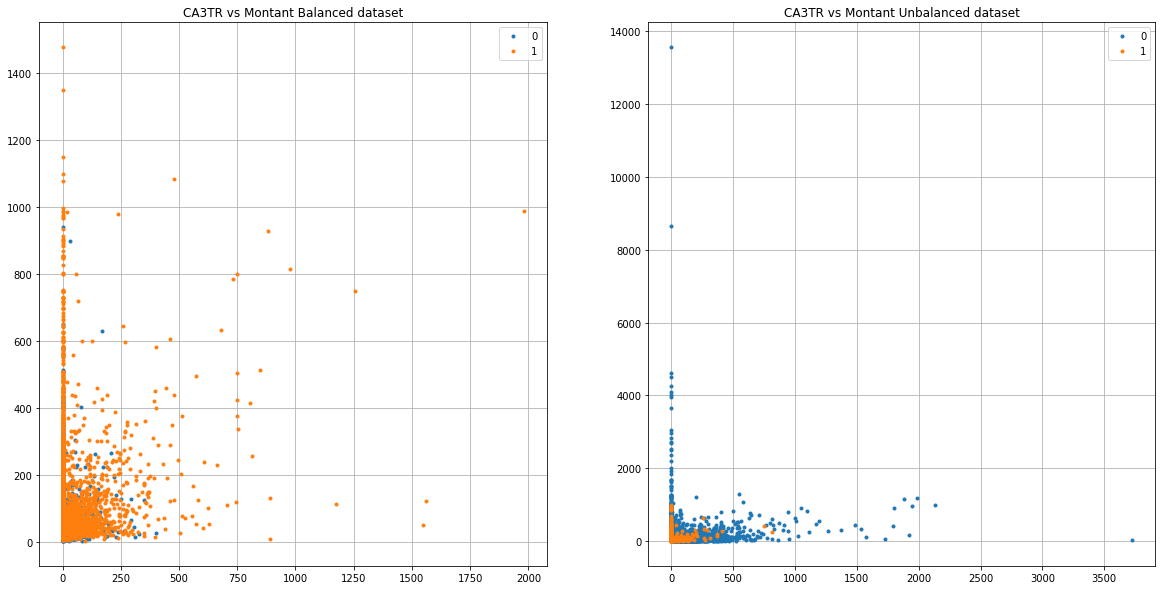

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

axs[0].plot(balanced_train[balanced_train["flagimpaye"] == 0 ]["ca3tr"],
        balanced_train[balanced_train["flagimpaye"] == 0 ]["montant"], marker='.', linestyle='',
        label="0")
axs[0].plot(balanced_train[balanced_train["flagimpaye"] == 1 ]["ca3tr"],
        balanced_train[balanced_train["flagimpaye"] == 1 ]["montant"], marker='.', linestyle='',
        label="1")
axs[0].set_title("CA3TR vs Montant Balanced dataset")

axs[1].plot(df[df["flagimpaye"] == 0 ]["ca3tr"],
        df[df["flagimpaye"] == 0 ]["montant"], marker='.', linestyle='',
        label="0")
axs[1].plot(df[df["flagimpaye"] == 1 ]["ca3tr"],
        df[df["flagimpaye"] == 1 ]["montant"], marker='.', linestyle='',
        label="1")
axs[1].set_title("CA3TR vs Montant Unbalanced dataset")

[ax.legend() for ax in axs ]
[ax.grid() for ax in axs ]
# [ax.set_xscale('log') for ax in axs ]
# [ax.set_yscale('log') for ax in axs ]

[None, None, None]

[None, None, None]

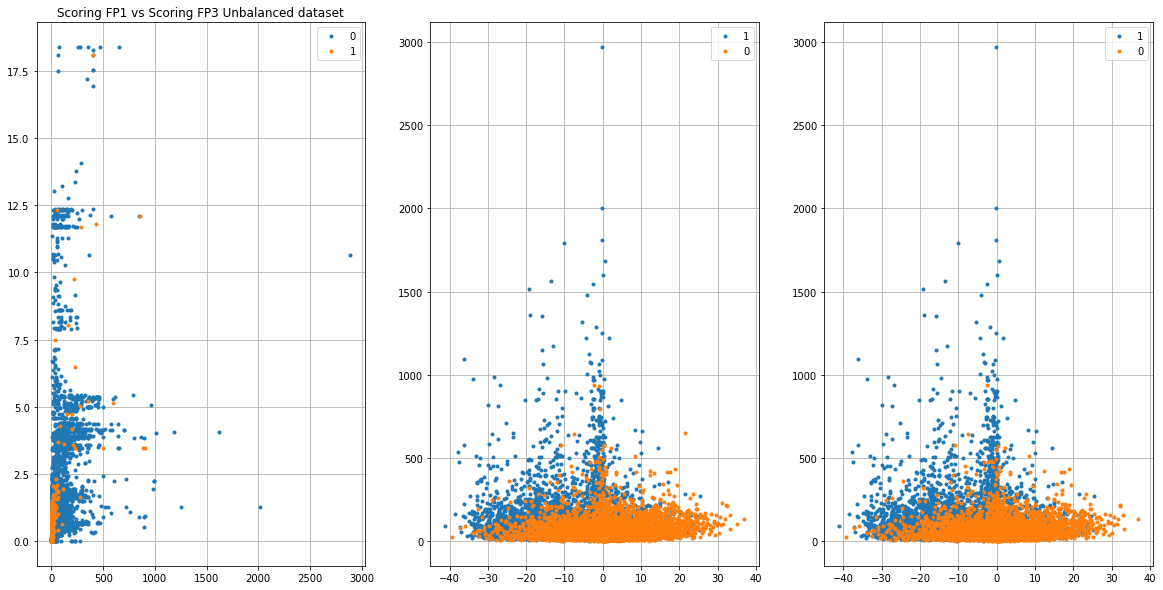

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

axs[0].plot(df[df["flagimpaye"] == 0 ]["scoringfp1"],
        df[df["flagimpaye"] == 0 ]["scoringfp3"], marker='.', linestyle='',
        label="0")
axs[0].plot(df[df["flagimpaye"] == 1 ]["scoringfp1"],
        df[df["flagimpaye"] == 1 ]["scoringfp3"], marker='.', linestyle='',
        label="1")
axs[0].set_title("Scoring FP1 vs Scoring FP3 Unbalanced dataset")

axs[1].plot(balanced_train[balanced_train["flagimpaye"] == 1 ]["scoringfp2"],
        balanced_train[balanced_train["flagimpaye"] == 1 ]["ca3tretmtt"], marker='.', linestyle='',
        label="1")
axs[1].plot(balanced_train[balanced_train["flagimpaye"] == 0 ]["scoringfp2"],
        balanced_train[balanced_train["flagimpaye"] == 0 ]["ca3tretmtt"], marker='.', linestyle='',
        label="0")

axs[2].plot(balanced_train_tomek[balanced_train_tomek["flagimpaye"] == 1 ]["scoringfp2"],
        balanced_train_tomek[balanced_train_tomek["flagimpaye"] == 1 ]["ca3tretmtt"], marker='.', linestyle='',
        label="1")
axs[2].plot(balanced_train_tomek[balanced_train_tomek["flagimpaye"] == 0 ]["scoringfp2"],
        balanced_train_tomek[balanced_train_tomek["flagimpaye"] == 0 ]["ca3tretmtt"], marker='.', linestyle='',
        label="0")


[ax.legend() for ax in axs ]
# [ax.set_xscale('log') for ax in axs ]
[ax.grid() for ax in axs ]
# [ax.set_yscale('log') for ax in axs ]